In [1]:
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
air_data = pd.read_csv('C:\\Users\\ASUS\\Desktop\\VS code\\PsuTerm02\\241-152\\final_project\\data_mange\\clean02_air4thai_44t_2023-01-01_2024-02-27.csv')
air_data = air_data.drop(['Unnamed: 0.1', 'Unnamed: 0', 'stationID'], axis=1, inplace=False)
air_data['DATETIMEDATA'] = pd.to_datetime(air_data['DATETIMEDATA'])
air_data

,DATETIMEDATA,PM25,O3,WS,TEMP,RH,WD
0,2024-01-01 00:00:00,16.5,16.0,1,27.0,79,115
1,2024-01-01 01:00:00,33.6,0.0,1,27.0,82,97
2,2024-01-01 02:00:00,34.2,0.0,1,26.0,84,96
3,2024-01-01 03:00:00,20.1,0.0,1,26.0,82,108
4,2024-01-01 04:00:00,16.5,1.0,1,27.0,79,106
...,...,...,...,...,...,...,...
1387,2024-02-27 19:00:00,21.7,9.0,1,29.0,67,162
1388,2024-02-27 20:00:00,17.5,1.0,1,29.0,68,134
1389,2024-02-27 21:00:00,21.1,0.0,1,29.0,69,140
1390,2024-02-27 22:00:00,23.2,0.0,1,29.0,70,111


In [3]:
from pycaret.regression import *
s = setup(air_data, target = 'TEMP', session_id = 123, date_features=['DATETIMEDATA'], normalize=True)

,Description,Value
0,Session id,123
1,Target,TEMP
2,Target type,Regression
3,Original data shape,"(1392, 7)"
4,Transformed data shape,"(1392, 9)"
5,Transformed train set shape,"(974, 9)"
6,Transformed test set shape,"(418, 9)"
7,Numeric features,5
8,Date features,1
9,Preprocess,True


In [4]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.4080,0.3146,0.5537,0.9363,0.0190,0.0144,0.1310
gbr,Gradient Boosting Regressor,0.4315,0.3404,0.5776,0.9309,0.0198,0.0153,0.0270
et,Extra Trees Regressor,0.4252,0.3630,0.5954,0.9268,0.0203,0.0150,0.0300
rf,Random Forest Regressor,0.4342,0.3744,0.6055,0.9241,0.0207,0.0153,0.0430
ada,AdaBoost Regressor,0.5283,0.4941,0.6989,0.8998,0.0240,0.0187,0.0200
dt,Decision Tree Regressor,0.4901,0.6576,0.8061,0.8647,0.0276,0.0172,0.0070
knn,K Neighbors Regressor,0.6749,0.8986,0.9429,0.8178,0.0318,0.0237,0.0100
br,Bayesian Ridge,0.9816,1.5843,1.2541,0.6785,0.0418,0.0343,0.0180
ridge,Ridge Regression,0.9815,1.5843,1.2541,0.6784,0.0418,0.0343,0.0070
lar,Least Angle Regression,0.9814,1.5844,1.2541,0.6784,0.0418,0.0343,0.0060


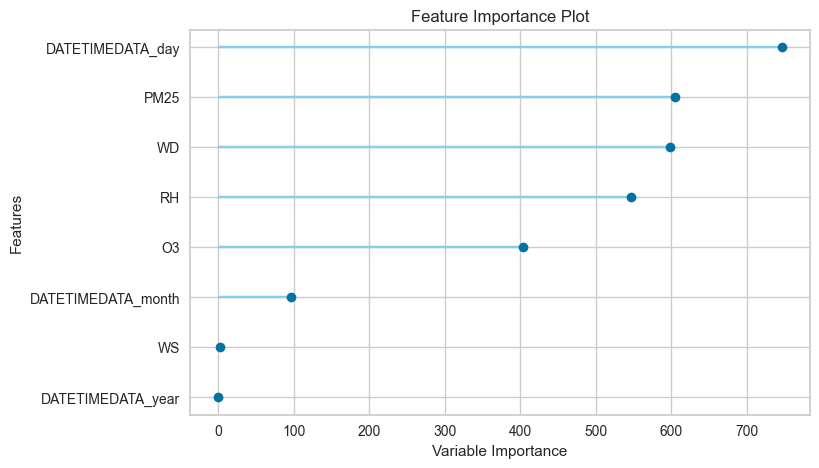

In [5]:
plot_model(best_model, plot = 'feature')

In [6]:
lightgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3489,0.2140,0.4626,0.9571,0.0156,0.0122
1,0.4298,0.3413,0.5842,0.9340,0.0199,0.0151
2,0.3902,0.2604,0.5103,0.9301,0.0170,0.0136
3,0.3761,0.2350,0.4847,0.9595,0.0165,0.0132
4,0.5381,0.6195,0.7871,0.8893,0.0288,0.0199
5,0.4219,0.3602,0.6001,0.9232,0.0205,0.0149
6,0.4249,0.3250,0.5701,0.9345,0.0192,0.0150
7,0.4067,0.2967,0.5447,0.9359,0.0187,0.0145
8,0.3790,0.2722,0.5217,0.9505,0.0173,0.0130


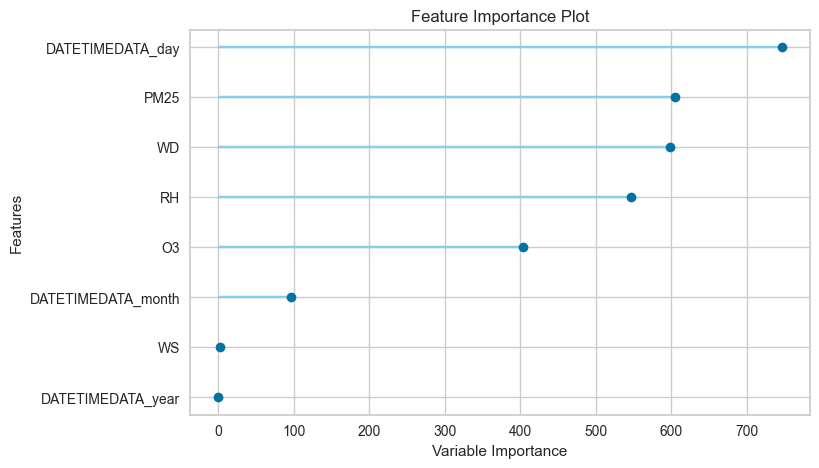

In [8]:
plot_model(lightgbm_model, plot = 'feature')

In [10]:
tuned_lightgbm_model = tune_model(lightgbm_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4607,0.3790,0.6156,0.9241,0.0205,0.0162
1,0.4688,0.4054,0.6367,0.9216,0.0216,0.0165
2,0.4300,0.2879,0.5366,0.9227,0.0181,0.0151
3,0.4708,0.3719,0.6099,0.9358,0.0205,0.0164
4,0.6190,0.7331,0.8562,0.8690,0.0311,0.0228
5,0.4870,0.3579,0.5982,0.9237,0.0204,0.0173
6,0.5297,0.4768,0.6905,0.9039,0.0232,0.0186
7,0.5434,0.5140,0.7169,0.8890,0.0242,0.0192
8,0.5169,0.5026,0.7090,0.9086,0.0233,0.0178


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [13]:
auto_ensemble_tuned_lightgbm_model = ensemble_model(tuned_lightgbm_model, method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3556,0.2190,0.4680,0.9561,0.0158,0.0125
1,0.4468,0.3543,0.5952,0.9315,0.0202,0.0157
2,0.3859,0.2534,0.5034,0.9320,0.0168,0.0134
3,0.3713,0.2348,0.4845,0.9595,0.0164,0.0130
4,0.5429,0.6239,0.7899,0.8885,0.0290,0.0201
5,0.4306,0.3425,0.5853,0.9270,0.0200,0.0152
6,0.4322,0.3309,0.5752,0.9333,0.0193,0.0152
7,0.4026,0.2939,0.5421,0.9365,0.0186,0.0143
8,0.3910,0.2884,0.5370,0.9476,0.0178,0.0135


In [14]:
set20_ensemble_tuned_lightgbm_model = ensemble_model(lightgbm_model, method='Bagging', n_estimators=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3506,0.2117,0.4601,0.9576,0.0155,0.0123
1,0.4444,0.3537,0.5947,0.9316,0.0202,0.0156
2,0.3923,0.2573,0.5072,0.9309,0.0169,0.0136
3,0.3685,0.2369,0.4867,0.9591,0.0165,0.0129
4,0.5454,0.6147,0.7840,0.8901,0.0287,0.0202
5,0.4207,0.3278,0.5725,0.9301,0.0195,0.0149
6,0.4306,0.3305,0.5749,0.9334,0.0193,0.0152
7,0.3937,0.2857,0.5345,0.9383,0.0183,0.0140
8,0.3854,0.2786,0.5278,0.9494,0.0175,0.0133


In [15]:
set50_ensemble_tuned_lightgbm_model = ensemble_model(lightgbm_model, method='Bagging', n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3486,0.2116,0.4600,0.9576,0.0155,0.0122
1,0.4429,0.3548,0.5956,0.9314,0.0203,0.0156
2,0.3895,0.2564,0.5064,0.9312,0.0169,0.0135
3,0.3701,0.2427,0.4927,0.9581,0.0167,0.0130
4,0.5410,0.6117,0.7821,0.8907,0.0287,0.0200
5,0.4184,0.3167,0.5628,0.9325,0.0192,0.0148
6,0.4329,0.3345,0.5783,0.9326,0.0194,0.0153
7,0.4036,0.2901,0.5386,0.9373,0.0185,0.0143
8,0.3839,0.2751,0.5245,0.9500,0.0174,0.0132


In [16]:
set70_ensemble_tuned_lightgbm_model = ensemble_model(lightgbm_model, method='Bagging', n_estimators=70)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3459,0.2098,0.4581,0.9580,0.0155,0.0121
1,0.4392,0.3491,0.5909,0.9325,0.0201,0.0155
2,0.3878,0.2572,0.5072,0.9309,0.0169,0.0135
3,0.3671,0.2419,0.4919,0.9583,0.0166,0.0129
4,0.5392,0.6107,0.7815,0.8909,0.0286,0.0200
5,0.4206,0.3182,0.5641,0.9321,0.0192,0.0148
6,0.4359,0.3358,0.5795,0.9323,0.0195,0.0154
7,0.4063,0.2920,0.5403,0.9369,0.0185,0.0144
8,0.3858,0.2773,0.5266,0.9496,0.0175,0.0133


In [17]:
set100_ensemble_tuned_lightgbm_model = ensemble_model(lightgbm_model, method='Bagging', n_estimators=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3483,0.2135,0.4620,0.9572,0.0156,0.0122
1,0.4397,0.3508,0.5923,0.9322,0.0202,0.0155
2,0.3878,0.2550,0.5050,0.9315,0.0168,0.0135
3,0.3679,0.2414,0.4913,0.9584,0.0166,0.0129
4,0.5387,0.6110,0.7816,0.8908,0.0286,0.0199
5,0.4195,0.3172,0.5632,0.9324,0.0192,0.0148
6,0.4321,0.3305,0.5749,0.9334,0.0193,0.0153
7,0.4049,0.2888,0.5374,0.9376,0.0184,0.0144
8,0.3886,0.2806,0.5297,0.9490,0.0176,0.0134


In [18]:
set150_ensemble_tuned_lightgbm_model = ensemble_model(lightgbm_model, method='Bagging', n_estimators=150)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3521,0.2162,0.4649,0.9567,0.0157,0.0124
1,0.4377,0.3467,0.5888,0.9330,0.0201,0.0154
2,0.3856,0.2539,0.5039,0.9318,0.0168,0.0134
3,0.3709,0.2433,0.4932,0.9580,0.0167,0.0130
4,0.5381,0.6119,0.7823,0.8906,0.0287,0.0199
5,0.4185,0.3155,0.5617,0.9327,0.0192,0.0148
6,0.4331,0.3304,0.5748,0.9334,0.0193,0.0153
7,0.4081,0.2919,0.5403,0.9370,0.0185,0.0145
8,0.3884,0.2795,0.5287,0.9492,0.0176,0.0134


In [19]:
set200_ensemble_tuned_lightgbm_model = ensemble_model(lightgbm_model, method='Bagging', n_estimators=200)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3515,0.2153,0.4640,0.9569,0.0157,0.0123
1,0.4366,0.3459,0.5882,0.9331,0.0200,0.0154
2,0.3851,0.2535,0.5035,0.9320,0.0168,0.0134
3,0.3712,0.2442,0.4942,0.9579,0.0167,0.0130
4,0.5399,0.6122,0.7825,0.8906,0.0287,0.0200
5,0.4199,0.3167,0.5627,0.9325,0.0192,0.0148
6,0.4324,0.3284,0.5731,0.9338,0.0193,0.0153
7,0.4082,0.2928,0.5411,0.9368,0.0185,0.0145
8,0.3894,0.2812,0.5303,0.9489,0.0176,0.0134


In [20]:
best_lightgbm_model = compare_models(include=[auto_ensemble_tuned_lightgbm_model, set20_ensemble_tuned_lightgbm_model, set50_ensemble_tuned_lightgbm_model, set70_ensemble_tuned_lightgbm_model, set100_ensemble_tuned_lightgbm_model, set150_ensemble_tuned_lightgbm_model, set200_ensemble_tuned_lightgbm_model])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
4,Bagging Regressor,0.4095,0.3123,0.5521,0.9368,0.0189,0.0145,8.5170
5,Bagging Regressor,0.4099,0.3122,0.5521,0.9368,0.0189,0.0145,13.3990
6,Bagging Regressor,0.4099,0.3123,0.5522,0.9368,0.0189,0.0145,18.7310
3,Bagging Regressor,0.4096,0.3127,0.5525,0.9367,0.0189,0.0145,6.2210
2,Bagging Regressor,0.4101,0.3131,0.5528,0.9366,0.0189,0.0145,4.5240
1,Bagging Regressor,0.4105,0.3135,0.5531,0.9365,0.0189,0.0145,14.1590
0,Bagging Regressor,0.4132,0.3186,0.5576,0.9355,0.0191,0.0146,6.9350


In [23]:
lastest_date = air_data['DATETIMEDATA'].max()


start_date = lastest_date + pd.DateOffset(hours=1)
end_date = start_date + pd.DateOffset(days=30, hours=23)
next_week = pd.date_range(start=start_date, end=end_date, freq='D')


next_week_data = pd.DataFrame({'DATETIMEDATA': next_week})


next_week_data['O3'] = 0
next_week_data['WS'] = 0
next_week_data['PM25'] = 0
next_week_data['RH'] = 0
next_week_data['WD'] = 0

model_predictions = predict_model(best_lightgbm_model, data=next_week_data).round(2)
predict_oneweek_data = pd.DataFrame(model_predictions, columns=['DATETIMEDATA', 'prediction_label'])
print(predict_oneweek_data)


   DATETIMEDATA  prediction_label
0    2024-02-28             26.59
1    2024-02-29             26.58
2    2024-03-01             26.81
3    2024-03-02             26.84
4    2024-03-03             26.88
5    2024-03-04             26.92
6    2024-03-05             26.86
7    2024-03-06             26.90
8    2024-03-07             26.90
9    2024-03-08             26.95
10   2024-03-09             26.90
11   2024-03-10             26.84
12   2024-03-11             26.75
13   2024-03-12             26.67
14   2024-03-13             26.68
15   2024-03-14             26.67
16   2024-03-15             26.67
17   2024-03-16             26.69
18   2024-03-17             26.66
19   2024-03-18             26.67
20   2024-03-19             26.69
21   2024-03-20             26.69
22   2024-03-21             26.67
23   2024-03-22             26.59
24   2024-03-23             26.52
25   2024-03-24             26.59
26   2024-03-25             26.61
27   2024-03-26             26.61
28   2024-03-2

In [24]:
predict_oneweek_data.to_csv('C:\\Users\\ASUS\\Desktop\\VS code\\PsuTerm02\\241-152\\final_project\\predict_data\\predictions_TEMP.csv')
